In [1]:
# importing libraries
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
season = "spring"
year = "2017"
s_year = year + '-01-01 00:00'
e_year = year + '-12-31 23:00'

if season == 'winter':
    firstMonthStart = year + '-01-01'
    firstMonthEnd = year + '-01-31'
    secondMonthStart = year + '-02-01'
    secondMonthEnd = year + '-02-28'
    thirdMonthStart = year + '-12-01'
    thirdMonthEnd = year + '-12-31'
    fm = 'Jan'
    sm = 'Feb'
    tm = 'Dec'

elif season == 'summer':
    firstMonthStart = year + '-06-01'
    firstMonthEnd = year + '-06-30'
    secondMonthStart = year + '-07-01'
    secondMonthEnd = year + '-07-31'
    thirdMonthStart = year + '-08-01'
    thirdMonthEnd = year + '-08-31'
    fm = 'Jun'
    sm = 'Jul'
    tm = 'Aug'

elif season == 'fall':
    firstMonthStart = year + '-09-01'
    firstMonthEnd = year + '-09-30'
    secondMonthStart = year + '-10-01'
    secondMonthEnd = year + '-10-31'
    thirdMonthStart = year + '-11-01'
    thirdMonthEnd = year + '-11-30'
    fm = 'Sep'
    sm = 'Oct'
    tm = 'Nov'

elif season == 'spring':
    firstMonthStart = year + '-03-01'
    firstMonthEnd = year + '-03-31'
    secondMonthStart = year + '-04-01'
    secondMonthEnd = year + '-04-30'
    thirdMonthStart = year + '-05-01'
    thirdMonthEnd = year + '-05-31'
    fm = 'Mar'
    sm = 'Apr'
    tm = 'May'


In [3]:
# reading csv file
df = pd.read_csv('weather.csv')
columns = df.columns.values

df['obstime'] = df['obstime'].apply(parser.parse)

# sorting data and dropping duplicate values 
df.sort_values("obstime", inplace=True)
df.drop_duplicates(keep=False, inplace=True)

# setting index on obstime
df = df.set_index(df['obstime'])

row_no = 1

# frequency = day. It can be hour(h), week(w) and month(m)
frq = "d"

df.head()

,obstime,temperature,pressure,wind_speed,wind_direction,relative_humidity
obstime,,,,,,
2017-01-02 00:01:00,2017-01-02 00:01:00,1.4,978.5,18.5,72,42.9
2017-01-02 00:02:00,2017-01-02 00:02:00,1.5,978.5,18.4,72,42.7
2017-01-02 00:03:00,2017-01-02 00:03:00,1.5,978.6,17.1,72,43.1
2017-01-02 00:04:00,2017-01-02 00:04:00,1.5,978.6,16.5,71,43.1
2017-01-02 00:05:00,2017-01-02 00:05:00,1.5,978.5,17.6,73,43.0


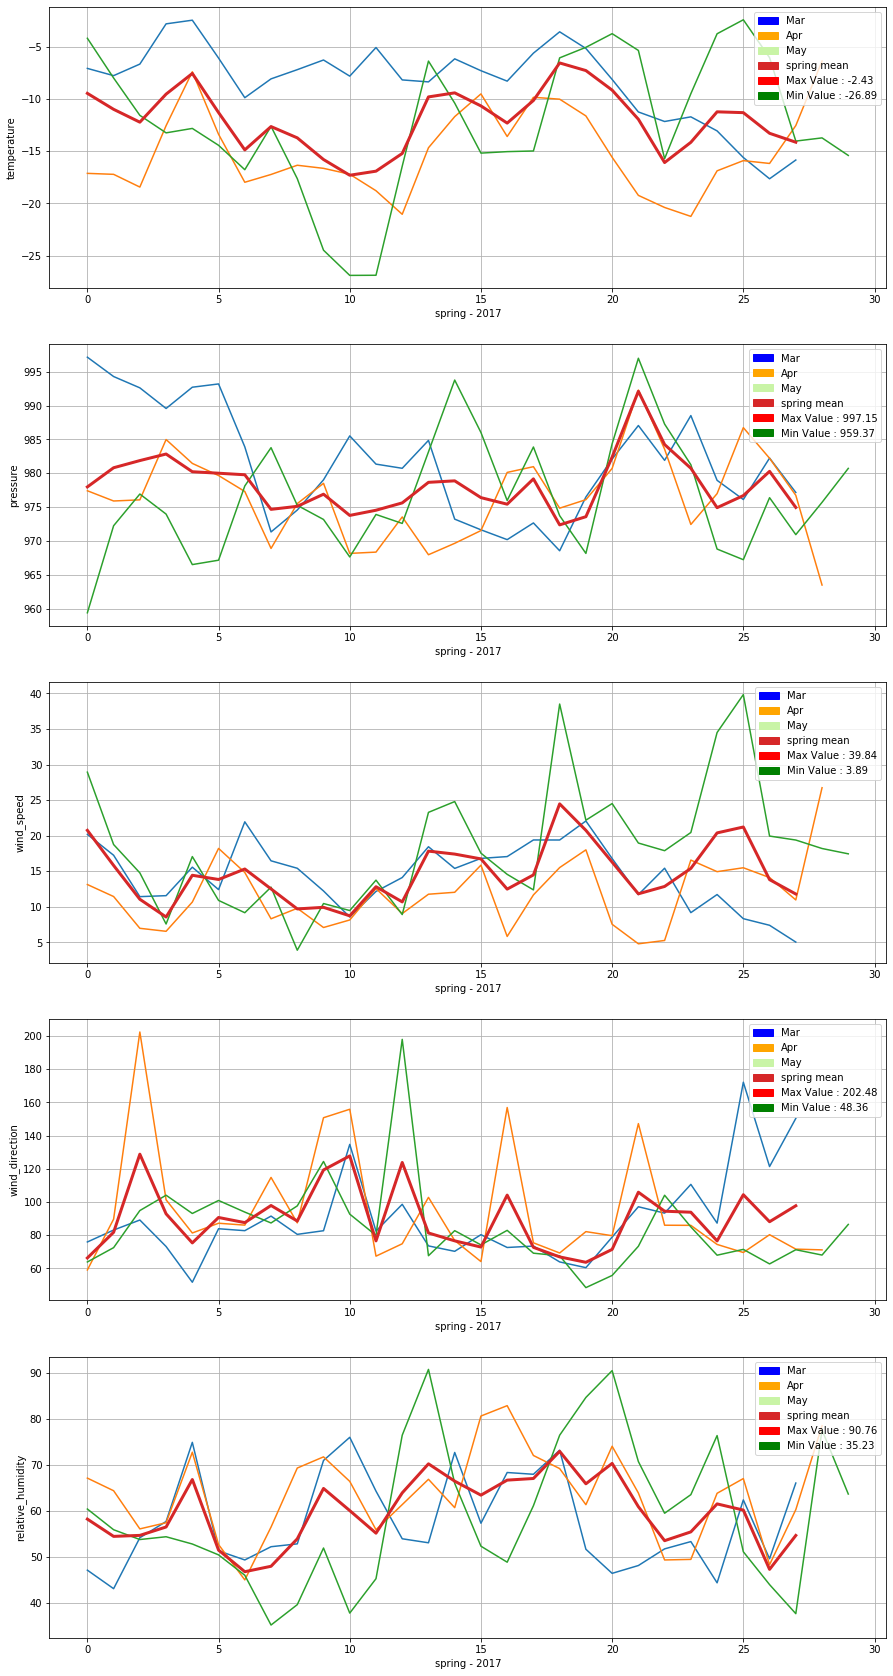

In [4]:
plt.figure(figsize=(15, 30))

# going over each data column
for column in columns[1:]:

    data = df[column]

    # removing incorrect data i.e. -999 and assigning colour for different data
    if column == "temperature":
        data = data[data > -273]
        colour = "orange"
    else:
        data = data[data > 0]
        if column == "wind_speed":
            colour = "blue"
        elif column == "wind_direction":
            colour = "red"
        elif column == "pressure":
            colour = "green"
        elif column == "relative_humidity":
            colour = "yellow"
            
    # group by freq. In this case days.
    data = data.groupby(pd.Grouper(freq=frq)).mean().dropna()

    if not data.empty:
        mean_d1 = data.loc[firstMonthStart:firstMonthEnd]
        k = len(mean_d1)
        d1_x = list(range(0, k))

        mean_d2 = data.loc[secondMonthStart:secondMonthEnd]
        k = len(mean_d2)
        d2_x = list(range(0, k))

        mean_d3 = data.loc[thirdMonthStart:thirdMonthEnd]
        k = len(mean_d3)
        d3_x = list(range(0, k))
        
        # Finding mean value for three months of the season
        mean_d = []
        for i, j, k in zip(mean_d1, mean_d2, mean_d3):
            mean_d.append((i + j + k) / 3.0)
        k = len(mean_d)
        d_x = list(range(0, k))

        maxm = str(round(max(max(mean_d1), max(mean_d2), max(mean_d3)), 2))
        minm = str(round(min(min(mean_d1), min(mean_d2), min(mean_d3)), 2))
        
        # assigning graph position
        plt.subplot(5, 1, row_no)
        
        # plotting graph
        plt.plot(d1_x, mean_d1)
        plt.plot(d2_x, mean_d2)
        plt.plot(d3_x, mean_d3)
        plt.plot(d_x, mean_d, linewidth=3.0)
        
        # Putting X and Y Labels
        plt.xlabel(season + " - " + year)
        plt.ylabel(column)
        plt.grid(True)

        fm_dl = mpatches.Patch(color='blue', label=fm, linewidth=1.0)
        sm_dl = mpatches.Patch(color='orange', label=sm)
        tm_dl = mpatches.Patch(color='#c9f4a6', label=tm)
        mm_dl = mpatches.Patch(color='#D62728', label=season + ' mean')
        
        # adding max and min into legends
        red_patch = mpatches.Patch(color='red', label='Max Value : ' + maxm)
        green_patch = mpatches.Patch(color='green', label='Min Value : ' + minm)

        plt.legend(loc=1, handles=[fm_dl, sm_dl, tm_dl, mm_dl, red_patch, green_patch])
        
        # increasing varibale value to plot another graph in plot.
        row_no += 1

plt.show()